In [2]:
from bruges.filters import ricker
from numpy.linalg import solve, lstsq
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Forward problem
Convolution of a wavelet with a refelctivity series

## Wavelet
Assume the data has been processed and using a zero phase wavelet is legit

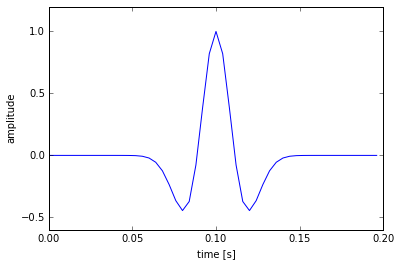

In [4]:
dt = 0.004
duration = 0.2 # seconds
frequency = 20.0 # Hz

wavelet = ricker(duration,dt, frequency)

t = np.arange(0, wavelet.size)*dt

plt.plot(t, wavelet);
plt.xlabel("time [s]"); plt.ylabel("amplitude")

## RC
Random white data

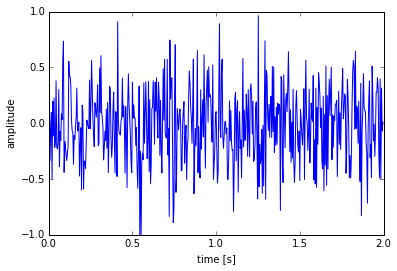

In [5]:
trace_duration = 2.0
rc = np.random.randn(trace_duration/dt)
rc /= np.amax(np.abs(rc)) # normalize
t = np.arange(0, rc.size)*dt
plt.plot(t, rc); plt.xlabel("time [s]");plt.ylabel("amplitude")

## Trace
Convolve the wavelet and the rc

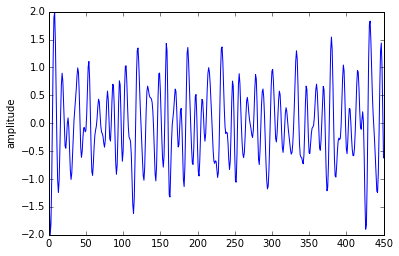

In [6]:
trace = np.convolve(wavelet, rc, mode='valid')
plt.plot(trace); plt.ylabel('amplitude')

#Inverse Problem
Pretend we don't know our wavelet and we have reflectivity from the log and a well tie trace from the seismic. How do we recover the wavelet?

First recognize that convolution is a linear operator, and therefore we can write it as a matrix-vector product:

trace = C*wavelet

Where C is a Toepplitz matrix constructed from the reflectivity

##Toeplitz matrix
A Toepplitz matrix has the property that each row is a shifted version of the one above. Since convolutions are just shifted inner products, there linear operators are Toepplitz matrices. 

In [7]:
def opConvolve(data, kernel_size):
    op = np.zeros((data.size-kernel_size+1, kernel_size))
    for i in range(data.size-kernel_size):
        op[i, :] = data[i:i+kernel_size]
    return op
        

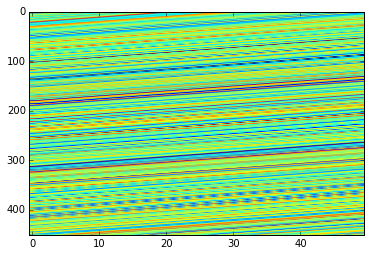

In [8]:
C = opConvolve(rc.T, wavelet.size)
plt.imshow(C, aspect='auto')

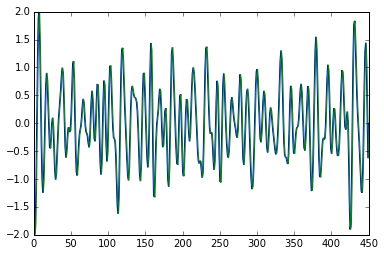

In [9]:
# Check that our Toepplitz matrix is actually the same as the convolution from our forward model
plt.plot(np.dot(C, wavelet))
plt.plot(trace)

#Inversion
Notice that our convolution matrix isn't square, so we can't simply invert it.

ie:

Cw=trace

w=inv(C)trace

So we solve the system using least squares. Notice the np.dot for our inner products. Julia and MATLAB use * as the default for inner products, making the syntax better for this kind of stuff.

In [20]:
wave_inv = lstsq(C, trace)[0]

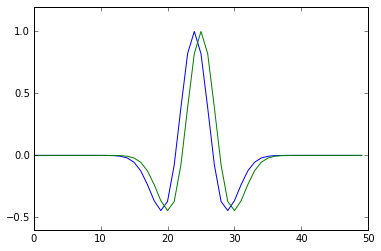

In [21]:
plt.plot(wave_inv)
plt.plot(wavelet)

Or how it was explained in the Strata package, we can solve for the psuedo inverse, which is the analytically solution to least squares:

Cw=trace
(Ct)Cw=(Ct)trace
w = inv(CtC)(Ct)trace

CtC is the covariance matrix

In [22]:
CtC = np.dot(C.T,C)
w_pseudo = solve(CtC, np.dot(C.T,trace))

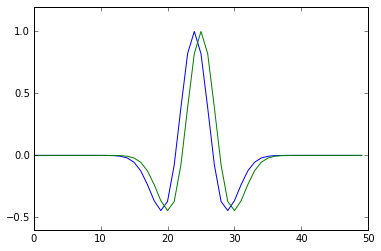

In [23]:
plt.plot(w_pseudo)
plt.plot(wavelet)